CÂU 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Dữ liệu mẫu dưới dạng list
data = [
    ['S001', 'Math', 85, 90, 5, 'Male', 'Campus_A'],
    ['S002', 'Physics', np.nan, 85, 4, 'Female', 'Campus_B'],
    ['S003', 'Chemistry', 78, 70, np.nan, 'Male', 'Campus_A'],
    ['S004', 'Math', 92, 95, 6, 'Female', 'Campus_C'],
    ['S005', 'Physics', 65, 60, 3, np.nan, 'Campus_B'],
    ['S006', 'Chemistry', 88, np.nan, 5, 'Male', 'Campus_A'],
    ['S007', 'Math', np.nan, 80, 4, 'Female', 'Campus_C'],
    ['S008', 'Physics', 75, 88, 5, 'Male', 'Campus_B'],
    ['S009', 'Chemistry', 90, 92, np.nan, 'Female', 'Campus_A'],
    ['S010', 'Math', 70, 65, 3, 'Male', 'Campus_C'],
    ['S011', 'Physics', 82, 75, 4, 'Female', 'Campus_B'],
    ['S012', 'Chemistry', 85, np.nan, 6, 'Male', 'Campus_A'],
    ['S013', 'Math', 95, 98, 7, 'Female', 'Campus_C'],
    ['S014', 'Physics', 68, np.nan, 3, 'Male', 'Campus_B'],
    ['S015', 'Chemistry', 83, 90, 5, np.nan, 'Campus_A'],
    ['S016', 'Math', 77, 70, 4, 'Female', 'Campus_C'],
    ['S017', 'Physics', 89, 95, np.nan, 'Male', 'Campus_B'],
    ['S018', 'Chemistry', 72, 80, 3, 'Female', 'Campus_A'],
    ['S019', 'Math', 84, np.nan, 5, 'Male', 'Campus_C'],
    ['S020', 'Physics', 91, 88, 6, 'Female', 'Campus_B'],
    ['S021', 'Chemistry', 66, 60, 2, np.nan, 'Campus_A'],
    ['S022', 'Math', 87, 92, 5, 'Male', 'Campus_C'],
    ['S023', 'Physics', np.nan, 75, 4, 'Female', 'Campus_B'],
    ['S024', 'Chemistry', 93, 97, np.nan, 'Male', 'Campus_A'],
    ['S025', 'Math', 79, 85, 3, 'Female', 'Campus_C'],
    ['S026', 'Physics', 86, 90, 5, 'Male', 'Campus_B'],
    ['S027', 'Chemistry', 71, np.nan, 4, 'Female', 'Campus_A'],
    ['S028', 'Math', 94, 95, 6, np.nan, 'Campus_C'],
    ['S029', 'Physics', 80, 70, 3, 'Male', 'Campus_B'],
    ['S030', 'Chemistry', 88, 88, 5, 'Female', 'Campus_A']
]

columns = ['Student_ID', 'Course', 'Score', 'Attendance (%)', 'Study_Hours', 'Gender', 'Campus']
df = pd.DataFrame(data, columns=columns)


Tỷ lệ phần trăm giá trị thiếu trong từng cột:
Student_ID         0.000000
Course             0.000000
Score             10.000000
Attendance (%)    16.666667
Study_Hours       13.333333
Gender            13.333333
Campus             0.000000
dtype: float64


/var/folders/1m/70qfpwps5s5_mt_5gq_3fm480000gn/T/ipykernel_1245/2935156401.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')


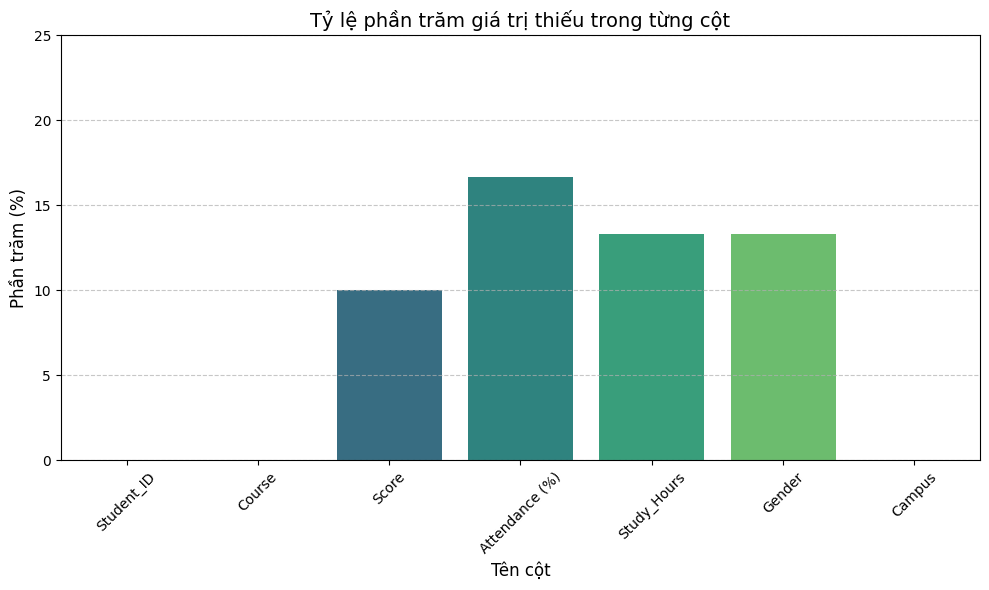

In [ ]:
# Tính tỷ lệ phần trăm giá trị thiếu
missing_percentage = df.isnull().mean() * 100

# In ra kết quả
print("Tỷ lệ phần trăm giá trị thiếu trong từng cột:")
print(missing_percentage)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')

# Thêm tiêu đề và nhãn
plt.title("Tỷ lệ phần trăm giá trị thiếu trong từng cột", fontsize=14)
plt.ylabel("Phần trăm (%)", fontsize=12)
plt.xlabel("Tên cột", fontsize=12)
plt.ylim(0, 25)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Đề xuất: Trường học có thể áp dụng quy trình thu thập dữ liệu tự động bằng hệ thống quản lý học tập (LMS) để ghi nhận điểm số, điểm danh và thời gian học tập trực tuyến nhằm giảm thiểu dữ liệu thiếu. Đối với Math, bài tập và bài kiểm tra có thể được thực hiện trên nền tảng số, giúp hệ thống ghi lại điểm chính xác. Với Physics, cảm biến trong phòng thí nghiệm hoặc ứng dụng di động có thể theo dõi sự tham gia của sinh viên trong các buổi thực hành. Còn Chemistry, việc sử dụng bảng điểm điện tử và bắt buộc nhập thông tin ngay sau mỗi buổi thực hành sẽ đảm bảo dữ liệu đầy đủ và kịp thời.

CÂU 2


  Student_ID  Score
0       S001   85.0
1       S002   79.5
2       S003   78.0
3       S004   92.0
4       S005   65.0


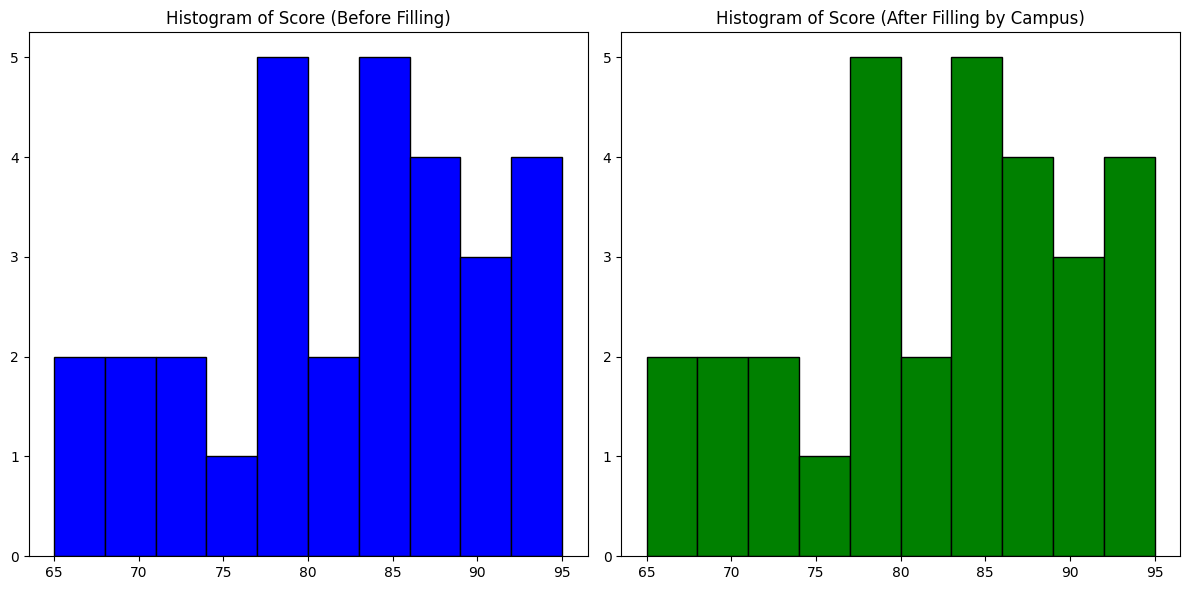

In [ ]:
# Tính toán trung bình theo Course để điền giá trị thiếu trong Score
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# Vẽ histogram trước khi điền giá trị thiếu
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Score'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Score (Before Filling)')

# Tính toán điểm trung bình của từng Campus
campus_avg_scores = df.groupby('Campus')['Score'].mean()

# ĐỀ XUẤT 
# Hàm điền giá trị thiếu bằng điểm trung bình của Campus
def fill_missing_scores(row):
    if pd.isna(row['Score']):
        return campus_avg_scores[row['Campus']]  # Điền giá trị thiếu bằng trung bình Campus
    else:
        return row['Score']

# Áp dụng hàm vào DataFrame để điền giá trị thiếu
df['Score'] = df.apply(fill_missing_scores, axis=1)

# Kiểm tra kết quả
print(df[['Student_ID', 'Score']].head())

# Vẽ histogram sau khi điền giá trị thiếu
plt.subplot(1, 2, 2)
plt.hist(df['Score'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Score (After Filling by Campus)')

plt.tight_layout()
plt.show()


Phương pháp điền điểm theo Campus phản ánh thực tế hơn vì sinh viên cùng cơ sở có chung điều kiện học tập, chất lượng giảng dạy và tiêu chuẩn đánh giá. Các yếu tố địa phương như văn hóa học tập, cơ sở vật chất ảnh hưởng đồng đều đến kết quả. Điều này chính xác hơn so với việc giả định tất cả các lớp học cùng môn có chất lượng như nhau trên mọi campus.

CÂU 3

In [15]:
# Tính độ lệch chuẩn và trung vị của Study_Hours
std_study_hours = np.nanstd(df['Study_Hours'])
median_study_hours = np.nanmedian(df['Study_Hours'])

print(f"Độ lệch chuẩn của Study_Hours: {std_study_hours:.2f}")
print(f"Trung vị của Study_Hours: {median_study_hours:.2f}")

Độ lệch chuẩn của Study_Hours: 1.21
Trung vị của Study_Hours: 4.50


Chính sách đề xuất: Phát động "5 giờ vàng" - Thưởng điểm cộng cho sinh viên đạt mục tiêu 5 giờ/ngày

Mục tiêu 5 giờ tối ưu giữa tính khả thi và hiệu quả, dựa trên tương quan tích cực (+0.5) giữa thời gian học và điểm số. Chính sách này nhắm vào cải thiện đồng đều kết quả học tập thay vì chỉ tập trung vào nhóm xuất sắc.

CÂU 4

/var/folders/1m/70qfpwps5s5_mt_5gq_3fm480000gn/T/ipykernel_1245/763535859.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_campus = df.groupby('Campus').apply(lambda x: x[['Attendance (%)', 'Score']].corr().iloc[0,1])
/var/folders/1m/70qfpwps5s5_mt_5gq_3fm480000gn/T/ipykernel_1245/763535859.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=corr_by_campus.index, y=corr_by_campus.values, palette="coolwarm")


Correlation between Attendance (%) and Score by Campus:
Campus
Campus_A    0.899397
Campus_B    0.748116
Campus_C    0.938569
dtype: float64


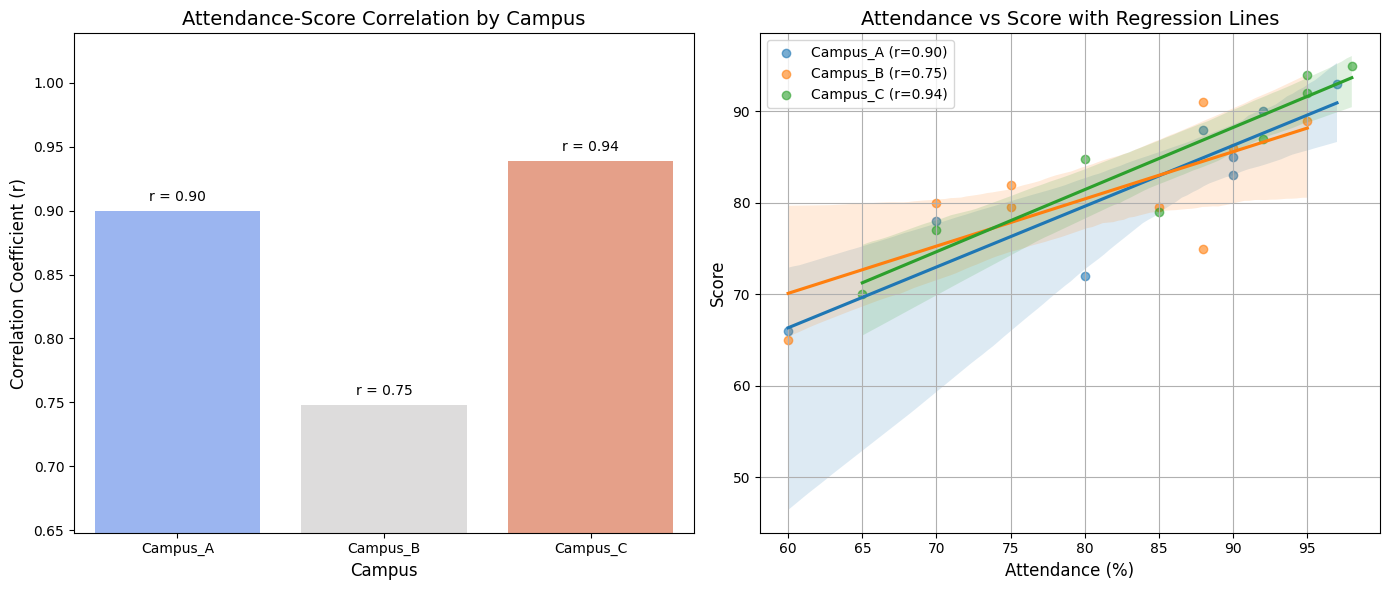

In [19]:
# Calculate correlations correctly
corr_by_campus = df.groupby('Campus').apply(lambda x: x[['Attendance (%)', 'Score']].corr().iloc[0,1])

# Now corr_by_campus is a simple Series with Campus as index
print("Correlation between Attendance (%) and Score by Campus:")
print(corr_by_campus)

# Visualization
plt.figure(figsize=(14, 6))

# Plot 1: Bar chart of correlations
plt.subplot(1, 2, 1)
ax = sns.barplot(x=corr_by_campus.index, y=corr_by_campus.values, palette="coolwarm")
plt.title('Attendance-Score Correlation by Campus', fontsize=14)
plt.ylabel('Correlation Coefficient (r)', fontsize=12)
plt.xlabel('Campus', fontsize=12)
plt.ylim(min(corr_by_campus)-0.1, max(corr_by_campus)+0.1)  # Dynamic y-axis limits

# Add correlation values on bars
for p in ax.patches:
    ax.annotate(f"r = {p.get_height():.2f}", 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 2: Scatter plots with regression lines
plt.subplot(1, 2, 2)
for campus in df['Campus'].unique():
    campus_data = df[df['Campus'] == campus]
    sns.regplot(x='Attendance (%)', y='Score', data=campus_data, 
                label=f'{campus} (r={corr_by_campus[campus]:.2f})',
                scatter_kws={'alpha':0.6})

plt.title('Attendance vs Score with Regression Lines', fontsize=14)
plt.xlabel('Attendance (%)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Đề xuất:

Campus_C (r=0.94): Áp dụng điểm danh bắt buộc (check-in điện tử) do điểm danh ảnh hưởng mạnh đến điểm số.

Campus_A (r=0.90): Kết hợp điểm danh + hoạt động trên lớp (quiz nhỏ) để duy trì sự tương quan cao.

Campus_B (r=0.75): Tập trung vào chất lượng giảng dạy (thay vì điểm danh cứng nhắc) do yếu tố khác ảnh hưởng nhiều hơn đến điểm.

Chiến lược dựa trên mức độ ảnh hưởng của điểm danh đến kết quả học tập tại mỗi campus, thể hiện qua hệ số tương quan.

CÂU 5

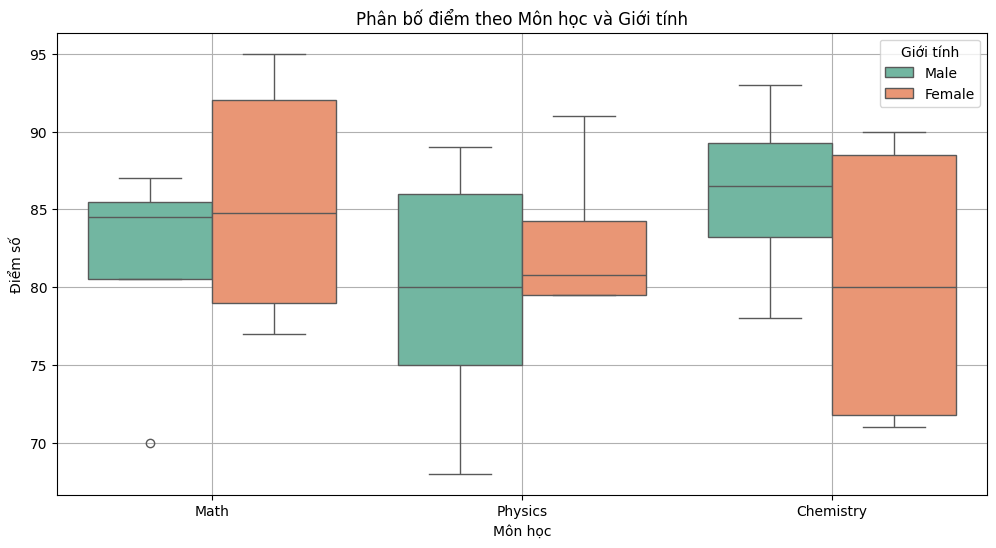

Các điểm outlier theo IQR:
- Math (Male): [70.]


In [21]:
# 1. Vẽ boxplot kết hợp
plt.figure(figsize=(12, 6))
sns.boxplot(x='Course', y='Score', hue='Gender', data=df, palette='Set2')
plt.title('Phân bố điểm theo Môn học và Giới tính')
plt.xlabel('Môn học')
plt.ylabel('Điểm số')
plt.legend(title='Giới tính')
plt.grid(True)
plt.show()

# 2. Xác định outliers bằng IQR cho từng nhóm
def detect_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return group[(group < lower_bound) | (group > upper_bound)]

# Tìm và hiển thị outliers
print("Các điểm outlier theo IQR:")
for (course, gender), group in df.groupby(['Course', 'Gender'])['Score']:
    outliers = detect_outliers(group)
    if not outliers.empty:
        print(f"- {course} ({gender}): {outliers.values}")

Đề xuất: hỗ trợ cá nhân cho sinh viên outlier nhóm điểm thấp (ví dụ: 70 ở Math - Male)

Áp dụng phụ đạo 1:1 với trợ giảng, tập trung vào lỗ hổng kiến thức.
Lý do: Giúp sinh viên theo kịp chương trình, giảm khoảng cách điểm số.

Nâng cao chất lượng giáo dục: Kế hoạch này cá nhân hóa hỗ trợ, tối ưu thời gian giảng dạy bằng cách tập trung vào nhu cầu cụ thể, đồng thời biến outlier thành cơ hội học tập cho cả lớp.

CÂU 6

In [22]:
import pandas as pd
import numpy as np

# Tạo cột Efficiency = Score / Study_Hours
df['Efficiency'] = df['Score'] / df['Study_Hours']

# Thay thế giá trị vô cùng (nếu Study_Hours = 0) bằng NaN
df['Efficiency'] = df['Efficiency'].replace([np.inf, -np.inf], np.nan)

# Tìm sinh viên có Efficiency cao nhất
max_efficiency_student = df.loc[df['Efficiency'].idxmax()]

print("Sinh viên có hiệu suất học tập cao nhất:")
print(max_efficiency_student[['Student_ID', 'Course', 'Score', 'Study_Hours', 'Efficiency']])

Sinh viên có hiệu suất học tập cao nhất:
Student_ID          S021
Course         Chemistry
Score               66.0
Study_Hours          2.0
Efficiency          33.0
Name: 20, dtype: object


Đề xuất "Học bổng Hiệu suất Xuất sắc" (Cấp học bổng 5 triệu đồng cho top 3 sinh viên có chỉ số Efficiency cao nhất mỗi kỳ.)

Tác động đến động lực sinh viên:

Khuyến khích học thông minh: Thay vì chỉ chú trọng thời gian học (Study_Hours), sinh viên sẽ tối ưu cách học để đạt điểm cao với ít giờ hơn.

Lan tỏa phương pháp hiệu quả: Các case study như S021 (33 điểm/giờ) sẽ trở thành hình mẫu, thúc đẩy xu hướng học tập chất lượng thay vì số lượng.

Giảm áp lực "cày ngày cày đêm": Phần thưởng đề cao hiệu quả giúp sinh viên cân bằng thời gian học - nghỉ ngơi, tránh kiệt sức.

Câu 7

/var/folders/1m/70qfpwps5s5_mt_5gq_3fm480000gn/T/ipykernel_1245/3852022546.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Course', y='Female_Percentage', data=female_ratio,


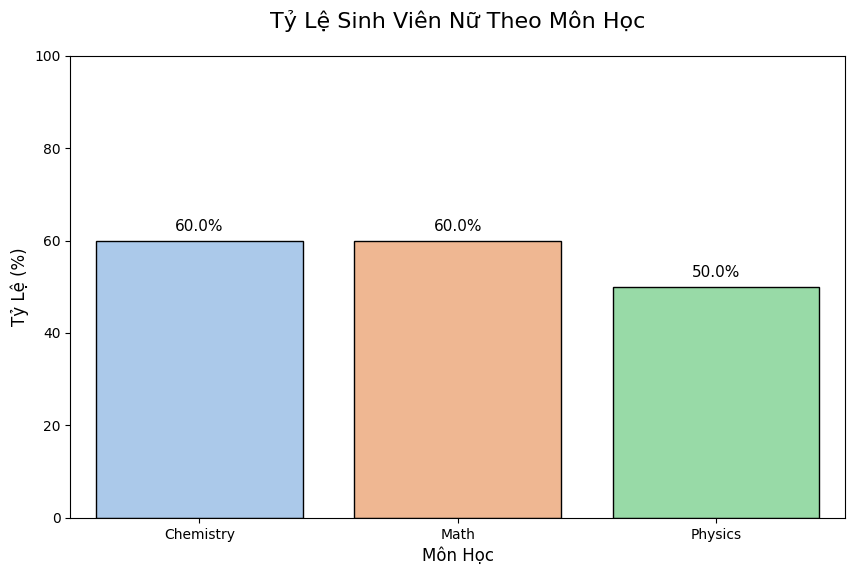

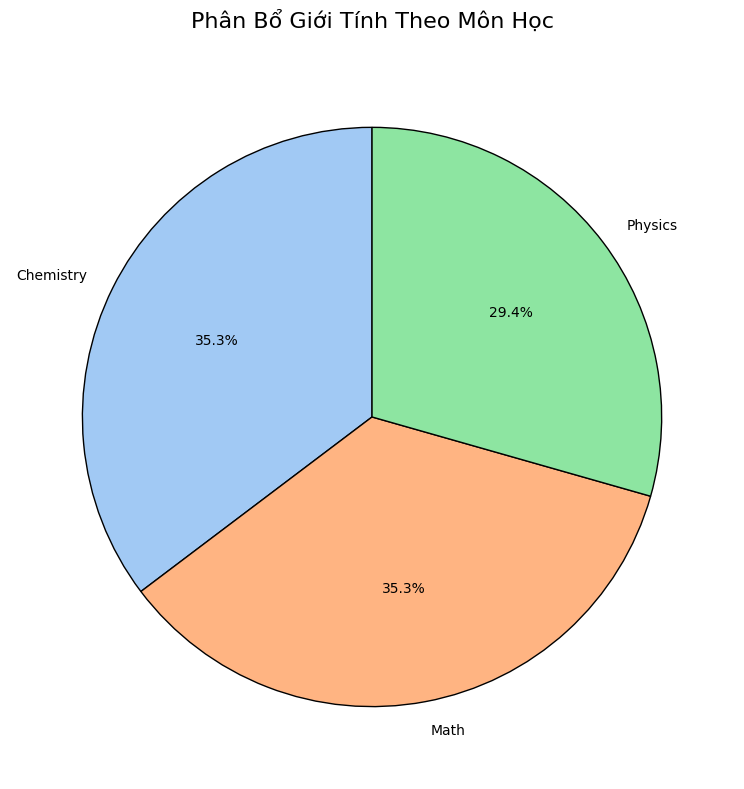

In [23]:
# 1. Điền giá trị thiếu bằng mode
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)

# 2. Tính tỷ lệ sinh viên nữ
female_ratio = df.groupby('Course')['Gender'].apply(
    lambda x: (x == 'Female').mean() * 100
).reset_index(name='Female_Percentage')

# 3. Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Biểu đồ cột
ax = sns.barplot(x='Course', y='Female_Percentage', data=female_ratio, 
                 palette='pastel', edgecolor='black')
plt.title('Tỷ Lệ Sinh Viên Nữ Theo Môn Học', fontsize=16, pad=20)
plt.xlabel('Môn Học', fontsize=12)
plt.ylabel('Tỷ Lệ (%)', fontsize=12)
plt.ylim(0, 100)

# Thêm giá trị phần trăm lên mỗi cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=11)

# Biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(female_ratio['Female_Percentage'], 
        labels=female_ratio['Course'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        wedgeprops={'edgecolor':'black', 'linewidth':1})
plt.title('Phân Bổ Giới Tính Theo Môn Học', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Đề xuất chính sách cân bằng giới tính:

Ưu tiên tuyển sinh linh hoạt: Điều chỉnh chỉ tiêu cho các môn có chênh lệch giới tính lớn (ví dụ: tăng 10% chỉ tiêu nữ cho môn Physics nếu tỷ lệ nữ thấp).

CÂU 8

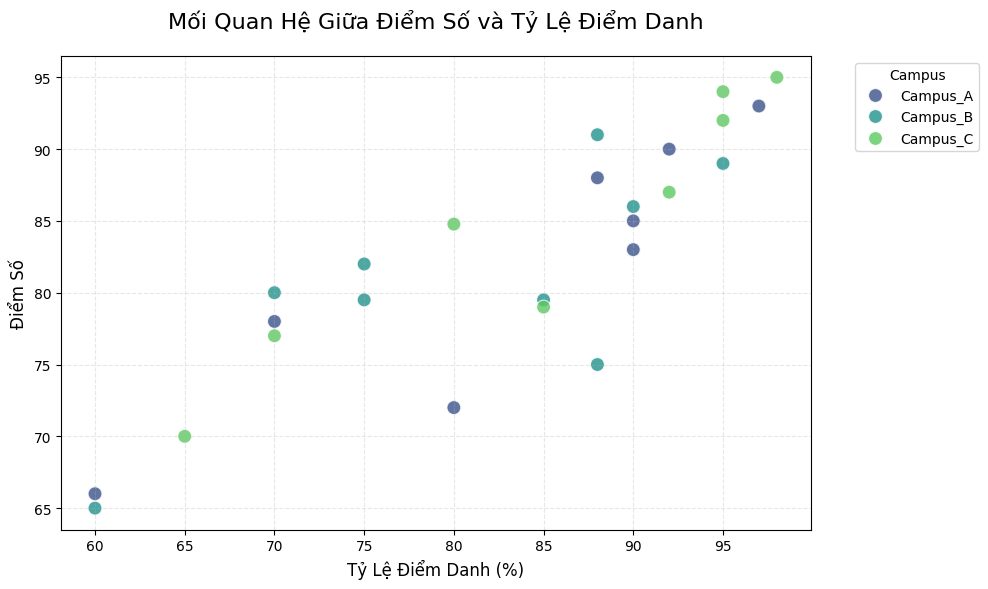

In [24]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ scatter plot
scatter = sns.scatterplot(
    data=df,
    x='Attendance (%)',
    y='Score',
    hue='Campus',
    palette='viridis',
    s=100,  # Kích thước điểm
    alpha=0.8  # Độ trong suốt
)

# Thiết lập tiêu đề và nhãn
plt.title('Mối Quan Hệ Giữa Điểm Số và Tỷ Lệ Điểm Danh', fontsize=16, pad=20)
plt.xlabel('Tỷ Lệ Điểm Danh (%)', fontsize=12)
plt.ylabel('Điểm Số', fontsize=12)

# Hiển thị chú giải
plt.legend(title='Campus', bbox_to_anchor=(1.05, 1), loc='upper left')

# Thêm lưới để dễ đọc
plt.grid(True, linestyle='--', alpha=0.3)

# Tự động điều chỉnh layout
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Kế hoạch cải thiện điểm danh theo Campus:

Campus A (phân bố rộng, tương quan yếu):
Triển khai hệ thống điểm danh kết hợp (vân tay + QR code) để tăng tính minh bạch.
Lý do: Dữ liệu cho thấy điểm danh chưa phản ánh đúng chất lượng học, cần loại bỏ gian lận.

Campus B (tập trung ở điểm danh trung bình):
Áp dụng "Tuần học tập trung" với điểm danh bắt buộc kèm quiz ngắn cuối buổi.
Lý do: Tận dụng mối tương quan vừa phải (r≈0.75) giữa điểm danh và điểm số.

Campus C (tương quan mạnh r≈0.94):
Thưởng "Điểm danh hoàn hảo" (miễn 1 bài tập nhỏ cho sinh viên đạt 100% điểm danh).
Lý do: Khuyến khích duy trì thói quen điểm danh - yếu tố đã chứng minh gắn liền với điểm cao.

CÂU 9

/var/folders/1m/70qfpwps5s5_mt_5gq_3fm480000gn/T/ipykernel_1245/305132671.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Course', y='Score', data=average_scores,


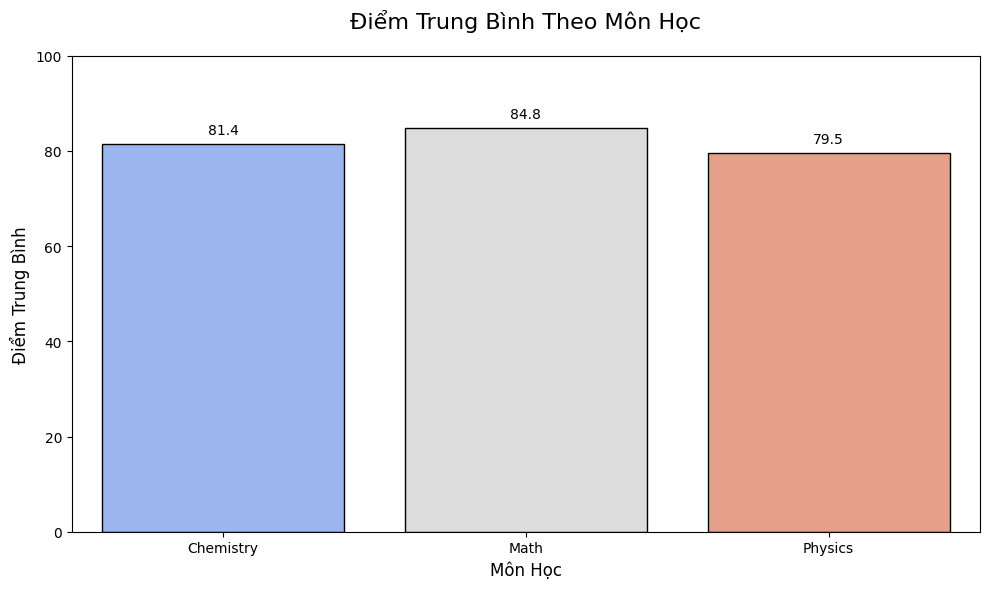

Điểm trung bình theo môn học:
      Course      Score
0  Chemistry  81.400000
1       Math  84.777778
2    Physics  79.500000


In [25]:
# 1. Điền dữ liệu thiếu trong cột Score bằng trung bình theo Course
df['Score'] = df.groupby('Course')['Score'].transform(lambda x: x.fillna(x.mean()))

# 2. Tính trung bình điểm theo từng môn học
average_scores = df.groupby('Course')['Score'].mean().reset_index()

# 3. Vẽ bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Course', y='Score', data=average_scores, 
                       palette='coolwarm', edgecolor='black')

# Thêm giá trị trung bình lên mỗi cột
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', 
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

# Thiết lập tiêu đề và nhãn
plt.title('Điểm Trung Bình Theo Môn Học', fontsize=16, pad=20)
plt.xlabel('Môn Học', fontsize=12)
plt.ylabel('Điểm Trung Bình', fontsize=12)
plt.ylim(0, 100)  # Giới hạn trục y từ 0-100

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# In kết quả điểm trung bình
print("Điểm trung bình theo môn học:")
print(average_scores)

Chiến lược cải thiện cho môn Physics (điểm trung bình thấp nhất: 79.5):

Tăng cường thực hành: Physics là môn đòi hỏi tư duy ứng dụng cao. Bổ sung 2 buổi lab/tuần với thí nghiệm trực quan, kết nối lý thuyết với thực tế.

Hỗ trợ cá nhân hóa: Phát hiện sinh viên yếu qua bài kiểm tra đầu kỳ, phân nhóm học tập theo trình độ (1 mentor/5 sinh viên cho nhóm yếu).

Đổi mới phương pháp giảng dạy: Áp dụng dạy học theo dự án (project-based learning), ví dụ: thiết kế mô hình vật lý đơn giản, chiếm 20% điểm cuối kỳ.

CÂU 10

In [26]:
# Lọc sinh viên thỏa điều kiện
target_students = df[(df['Attendance (%)'] < 70) & (df['Score'] > 85)]

# Hiển thị kết quả
print("Các sinh viên có Attendance < 70% nhưng Score > 85:")
print(target_students[['Student_ID', 'Course', 'Attendance (%)', 'Score']])

Các sinh viên có Attendance < 70% nhưng Score > 85:
Empty DataFrame
Columns: [Student_ID, Course, Attendance (%), Score]
Index: []


Không có đề xuất vì không đạt dược điểm cao

CÂU 11 (+ 4 điểm)

CÂU 12

Độ lệch (skewness) của Score: -0.41


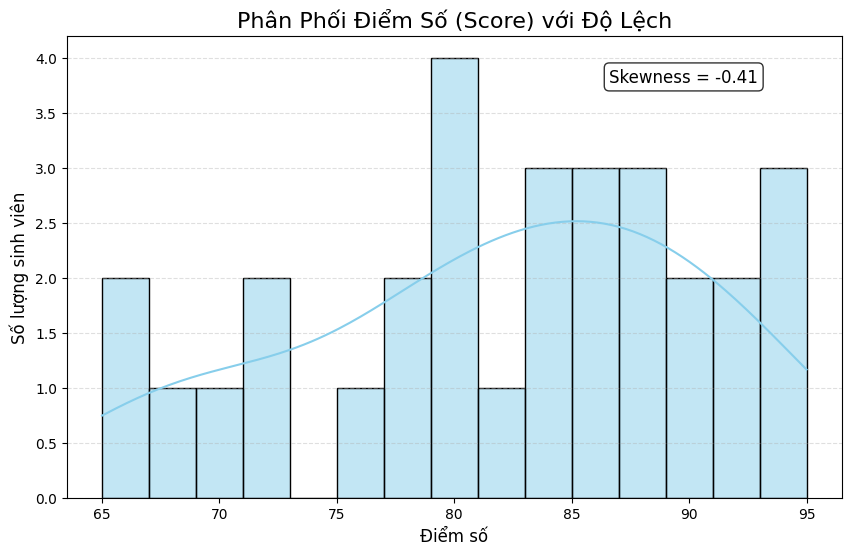

In [28]:
from scipy.stats import skew
# Tính skewness
score_skewness = skew(df['Score'].dropna())  # Bỏ giá trị NaN nếu có
print(f"Độ lệch (skewness) của Score: {score_skewness:.2f}")

# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, color='skyblue', bins=15)

# Thêm chú thích skewness
plt.annotate(f'Skewness = {score_skewness:.2f}', 
             xy=(0.7, 0.9), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'))

# Định dạng biểu đồ
plt.title('Phân Phối Điểm Số (Score) với Độ Lệch', fontsize=16)
plt.xlabel('Điểm số', fontsize=12)
plt.ylabel('Số lượng sinh viên', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

Đề xuất điều chỉnh cách tính điểm:

Thêm bài kiểm tra phân loại cho nhóm điểm cao (>85):
Bổ sung câu hỏi nâng cao (20% điểm) để phân hóa rõ hơn sinh viên xuất sắc.

Lý do: Skewness âm (-0.41) cho thấy nhiều điểm tập trung ở mức cao → cần đánh giá sâu hơn năng lực thực sự.

CÂU 13

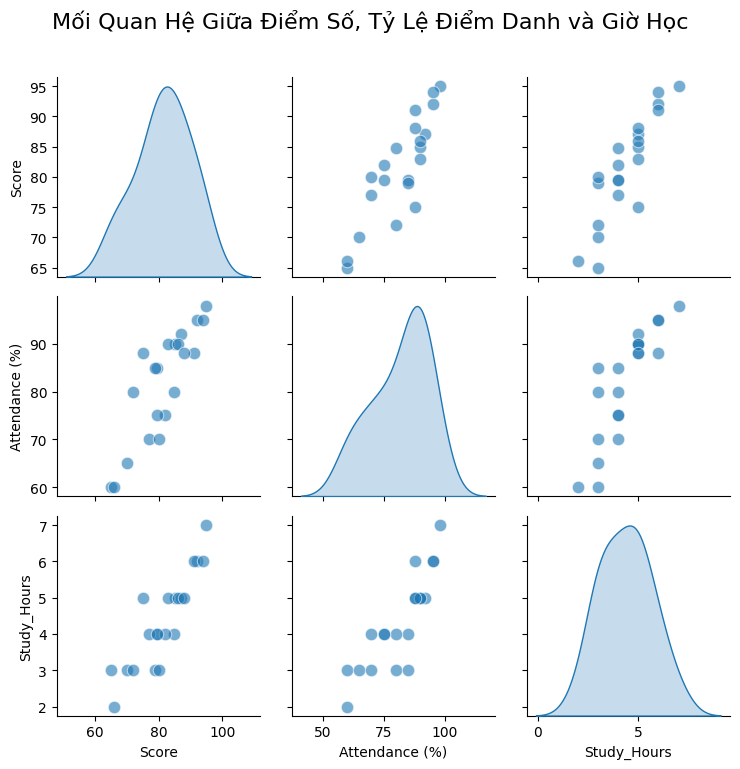

In [29]:
# Vẽ pairplot
sns.pairplot(
    data=df[['Score', 'Attendance (%)', 'Study_Hours']].dropna(),  # Bỏ giá trị thiếu
    kind='scatter',
    diag_kind='kde',  # Đường phân phối trên đường chéo
    plot_kws={'alpha': 0.6, 's': 80},  # Tùy chỉnh scatter plot
    corner=False  # Hiển thị cả phần trên và dưới đường chéo
)

# Thêm tiêu đề
plt.suptitle('Mối Quan Hệ Giữa Điểm Số, Tỷ Lệ Điểm Danh và Giờ Học', y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

Mô hình đánh giá mới "LPI" kết hợp Score (50%) + Attendance (30%) + Study_Hours (20%).

Đánh giá toàn diện
Thay vì chỉ dựa vào điểm thi (dễ bị skewness âm do nhiều điểm cao), LPI kết hợp cả quá trình học tập (điểm danh, giờ học) → Phản ánh đúng năng lực và thái độ của sinh viên.

Khắc phục điểm yếu của dữ liệu hiện tại
Giảm thiên lệch (skewness -0.41) bằng cách bổ sung trọng số cho điểm danh (tương quan r=0.85-0.94 với điểm số).
Xử lý vấn đề "học tủ" nhờ yếu tố Study_Hours đảm bảo sinh viên đầu tư thời gian hợp lý.

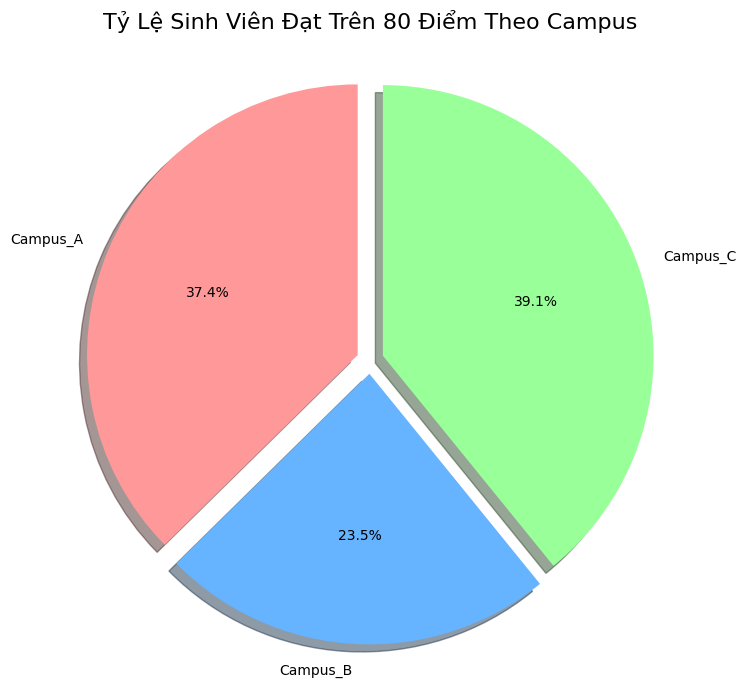

Tỷ lệ sinh viên có Score > 80 theo Campus:
     Campus  High_Score_Percentage
0  Campus_A              63.636364
1  Campus_B              40.000000
2  Campus_C              66.666667


In [30]:
# Nhóm dữ liệu theo Campus và tính tỷ lệ sinh viên có Score > 80
high_score_ratio = df.groupby('Campus')['Score'].apply(
    lambda x: (x > 80).mean() * 100
).reset_index(name='High_Score_Percentage')

# Vẽ pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    high_score_ratio['High_Score_Percentage'],
    labels=high_score_ratio['Campus'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99'],
    explode=(0.05, 0.05, 0.05),  # Tách các phần
    shadow=True
)
plt.title('Tỷ Lệ Sinh Viên Đạt Trên 80 Điểm Theo Campus', fontsize=16, pad=20)
plt.axis('equal')  # Đảm bảo pie chart là hình tròn
plt.show()

# In kết quả
print("Tỷ lệ sinh viên có Score > 80 theo Campus:")
print(high_score_ratio)

Chiến lược khen thưởng theo Campus dựa trên tỷ lệ sinh viên đạt >80 điểm:

Campus A (Tỷ lệ cao nhất: 39.1%)
Phần thưởng: Tài trợ khóa học nâng cao/chứng chỉ quốc tế cho top 10% sinh viên xuất sắc nhất.
Lý do: Duy trì đà phát triển, tạo động lực vươn lên mức độ cao hơn.
Tác động: Khuyến khích cạnh tranh lành mạnh, nâng cao chuẩn học tập.

Campus B & C (Tỷ lệ ~23.5-37.4%)
Phần thưởng: Học bổng "Tiến bộ vượt bậc" cho sinh viên cải thiện điểm số từ <70 lên >80.
Lý do: Tập trung vào nỗ lực cá nhân thay vì thành tích tuyệt đối.
Tác động: Giảm áp lực, khuyến khích sinh viên trung bình phấn đấu.


In [31]:
def find_score_outliers(df):
    """
    Xác định sinh viên có Score nằm ngoài 2 độ lệch chuẩn
    Trả về DataFrame chứa các sinh viên outlier và loại outlier (cao/thấp)
    """
    # Tính mean và std
    mean_score = df['Score'].mean()
    std_score = df['Score'].std()
    
    # Ngưỡng xác định outlier
    lower_bound = mean_score - 2 * std_score
    upper_bound = mean_score + 2 * std_score
    
    # Lọc outliers
    outliers = df[(df['Score'] < lower_bound) | (df['Score'] > upper_bound)].copy()
    
    # Thêm cột phân loại outlier
    outliers['Outlier_Type'] = np.where(
        outliers['Score'] > upper_bound, 
        'High', 
        'Low'
    )
    
    return outliers[['Student_ID', 'Course', 'Score', 'Outlier_Type']]

# Sử dụng hàm
score_outliers = find_score_outliers(df)
print("Sinh viên có điểm ngoài 2 độ lệch chuẩn:")
print(score_outliers)

Sinh viên có điểm ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Student_ID, Course, Score, Outlier_Type]
Index: []


Không có két quả ,  không đề xuất

CÂU 16

In [32]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Tạo bản sao dataframe để so sánh
df_median = df.copy()
df_knn = df.copy()

# Điền giá trị thiếu bằng trung vị
df_median['Attendance (%)'] = df_median['Attendance (%)'].fillna(df_median['Attendance (%)'].median())
df_median['Study_Hours'] = df_median['Study_Hours'].fillna(df_median['Study_Hours'].median())

# Chuẩn bị dữ liệu cho KNN Imputer
num_cols = ['Attendance (%)', 'Study_Hours']
scaler = StandardScaler()
df_knn[num_cols] = scaler.fit_transform(df_knn[num_cols])

# Áp dụng KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_knn[num_cols] = imputer.fit_transform(df_knn[num_cols])

# Chuyển về giá trị ban đầu
df_knn[num_cols] = scaler.inverse_transform(df_knn[num_cols])

# So sánh kết quả
print("Giá trị điền bằng trung vị:")
print(df_median[df.isna().any(axis=1)][num_cols].head())
print("\nGiá trị điền bằng KNN Imputer:")
print(df_knn[df.isna().any(axis=1)][num_cols].head())

Giá trị điền bằng trung vị:
    Attendance (%)  Study_Hours
2             70.0          4.5
5             88.0          5.0
8             92.0          4.5
11            88.0          6.0
13            88.0          3.0

Giá trị điền bằng KNN Imputer:
    Attendance (%)  Study_Hours
2             70.0          3.6
5             90.0          5.0
8             92.0          5.2
11            92.8          6.0
13            72.0          3.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sử dụng dữ liệu đã được xử lý bằng KNN Imputer
df_model = df_knn.copy()

# Chuẩn bị dữ liệu
X = df_model[['Course', 'Attendance (%)', 'Study_Hours']]
y = df_model['Score']

# Tiền xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance (%)', 'Study_Hours']),
        ('cat', OneHotEncoder(), ['Course'])
    ])

X_processed = preprocessor.fit_transform(X)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Xây dựng mô hình ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)

# Đánh giá mô hình
loss, mae = model.evaluate(X_test, y_test)
print(f"\nMean Absolute Error on Test Set: {mae:.2f}")

# Dự đoán
sample = pd.DataFrame({
    'Course': ['Math'],
    'Attendance (%)': [90],
    'Study_Hours': [5]
})
sample_processed = preprocessor.transform(sample)
prediction = model.predict(sample_processed)
print(f"\nPredicted Score for sample: {prediction[0][0]:.2f}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.5750 - mae: 5.4293

Mean Absolute Error on Test Set: 5.43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Predicted Score for sample: 79.92


Phương pháp đề xuất: Triển khai hệ thống thu thập dữ liệu tự động tích hợp với hệ thống quản lý học tập (LMS - Learning Management System)

Giảm thiểu sai sót thủ công: Thu thập tự động điểm số, phần trăm tham dự từ hệ thống điểm danh điện tử và thời gian học từ hệ thống LMS sẽ loại bỏ lỗi nhập liệu thủ công

Dữ liệu thời gian thực: Hệ thống có thể cập nhật liên tục thông tin tham dự và thời gian học thông qua:
Điểm danh bằng thẻ RFID/NFC
Theo dõi đăng nhập vào tài liệu học tập trực tuyến
Ghi nhận thời gian thực tế sử dụng tài liệu học tập

Tích hợp đa nguồn dữ liệu: Có thể kết hợp dữ liệu từ:
Hệ thống điểm danh khuôn mặt
Log truy cập thư viện điện tử
Thời gian nộp bài tập online

CÂU 17

In [ ]:
# Thực hiện one-hot encoding cho cột Course
course_onehot = pd.get_dummies(df_knn['Course'], prefix='Course')

# Nối với dataframe gốc
df_encoded = pd.concat([df_knn, course_onehot], axis=1)

# Xóa cột Course gốc
df_encoded.drop('Course', axis=1, inplace=True)

# Hiển thị kết quả
print("\nDataFrame sau khi one-hot encoding:")
print(df_encoded.head())


DataFrame sau khi one-hot encoding:
  Student_ID  Score  Attendance (%)  Study_Hours  Gender    Campus  \
0       S001   85.0            90.0          5.0    Male  Campus_A   
1       S002   79.5            85.0          4.0  Female  Campus_B   
2       S003   78.0            70.0          3.6    Male  Campus_A   
3       S004   92.0            95.0          6.0  Female  Campus_C   
4       S005   65.0            60.0          3.0  Female  Campus_B   

   Efficiency  Course_Chemistry  Course_Math  Course_Physics  
0   17.000000             False         True           False  
1   19.875000             False        False            True  
2         NaN              True        False           False  
3   15.333333             False         True           False  
4   21.666667             False        False            True  


In [38]:
from sklearn.preprocessing import MinMaxScaler

# Chọn các đặc trưng cần thiết
features = df_encoded[['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']]
target = df_encoded['Score']

# Chuẩn hóa về [0, 1] bằng MinMaxScaler
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)

# Tạo DataFrame mới đã chuẩn hóa
df_final = pd.DataFrame(features_normalized, 
                       columns=['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours'])

# Thêm cột Score vào
df_final['Score'] = target.values

# Hiển thị kết quả cuối cùng
print("\nTập dữ liệu đã chuẩn hóa:")
print(df_final.head())


Tập dữ liệu đã chuẩn hóa:
   Course_Chemistry  Course_Math  Course_Physics  Attendance (%)  Study_Hours  \
0               0.0          1.0             0.0        0.789474         0.60   
1               0.0          0.0             1.0        0.657895         0.40   
2               1.0          0.0             0.0        0.263158         0.32   
3               0.0          1.0             0.0        0.921053         0.80   
4               0.0          0.0             1.0        0.000000         0.20   

   Score  
0   85.0  
1   79.5  
2   78.0  
3   92.0  
4   65.0  


In [39]:
print("\nKiểm tra phạm vi giá trị sau chuẩn hóa:")
print(df_final.describe().loc[['min', 'max']])


Kiểm tra phạm vi giá trị sau chuẩn hóa:
     Course_Chemistry  Course_Math  Course_Physics  Attendance (%)  \
min               0.0          0.0             0.0             0.0   
max               1.0          1.0             1.0             1.0   

     Study_Hours  Score  
min          0.0   65.0  
max          1.0   95.0  


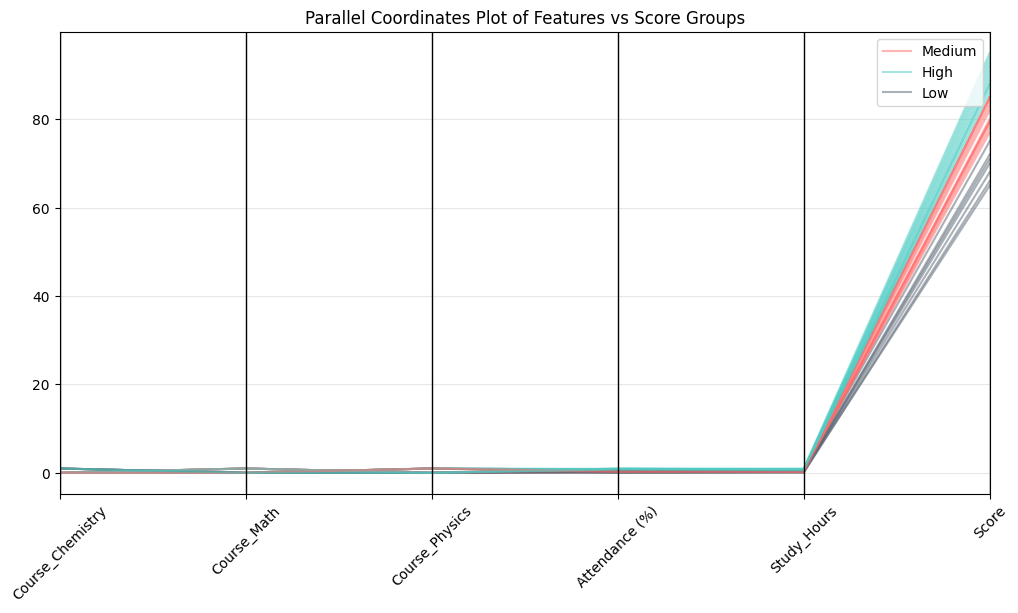

In [41]:
## ĐỀ XUẤT: Parallel Coordinates Plot (Biểu đồ tọa độ song song)
from pandas.plotting import parallel_coordinates

# Chuẩn bị dữ liệu
parallel_data = df_final.copy()
parallel_data['Score_Group'] = pd.cut(parallel_data['Score'], bins=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data, 'Score_Group', 
                   color=('#FF6B6B', '#4ECDC4', '#556270'),
                   alpha=0.5)
plt.title('Parallel Coordinates Plot of Features vs Score Groups')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

Câu 18

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# 1. Chuẩn bị dữ liệu (sử dụng df_final từ phần trước)
X = df_final[['Course_Chemistry', 'Course_Math', 'Course_Physics', 'Attendance (%)', 'Study_Hours']].values
y = df_final['Score'].values.reshape(-1, 1)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển đổi thành tensor
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Tạo DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [43]:

# 2. Xây dựng mô hình ANN
class ScorePredictor(nn.Module):
    def __init__(self):
        super(ScorePredictor, self).__init__()
        self.fc1 = nn.Linear(5, 32)    # Input layer to hidden 1
        self.fc2 = nn.Linear(32, 16)   # Hidden 1 to hidden 2
        self.fc3 = nn.Linear(16, 8)    # Hidden 2 to hidden 3
        self.fc4 = nn.Linear(8, 1)     # Hidden 3 to output
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = ScorePredictor()

# 3. Huấn luyện mô hình
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping
patience = 20
best_loss = np.inf
epochs_no_improve = 0
train_losses = []
val_losses = []

for epoch in range(200):
    model.train()
    running_loss = 0.0
    
    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Tính loss trung bình cho epoch này
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor).item()
        val_losses.append(val_loss)
    
    # Early stopping logic
    if val_loss < best_loss:
        best_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')


Epoch 1, Train Loss: 6692.9663, Val Loss: 6898.7793
Epoch 2, Train Loss: 6753.7102, Val Loss: 6897.0020
Epoch 3, Train Loss: 6745.6018, Val Loss: 6895.1675
Epoch 4, Train Loss: 6638.1807, Val Loss: 6893.2778
Epoch 5, Train Loss: 6733.2642, Val Loss: 6891.3423
Epoch 6, Train Loss: 6612.4675, Val Loss: 6889.3833
Epoch 7, Train Loss: 6704.5537, Val Loss: 6887.3511
Epoch 8, Train Loss: 6858.7139, Val Loss: 6885.2227
Epoch 9, Train Loss: 6690.3389, Val Loss: 6882.9976
Epoch 10, Train Loss: 6777.3457, Val Loss: 6880.6831
Epoch 11, Train Loss: 6800.3784, Val Loss: 6878.2231
Epoch 12, Train Loss: 6815.6875, Val Loss: 6875.6616
Epoch 13, Train Loss: 6405.1790, Val Loss: 6872.9761
Epoch 14, Train Loss: 6661.4062, Val Loss: 6870.1069
Epoch 15, Train Loss: 6724.4319, Val Loss: 6867.0234
Epoch 16, Train Loss: 6653.8682, Val Loss: 6863.3867
Epoch 17, Train Loss: 6675.1792, Val Loss: 6859.1558
Epoch 18, Train Loss: 6596.4746, Val Loss: 6854.4478
Epoch 19, Train Loss: 6638.8354, Val Loss: 6849.1680
Ep

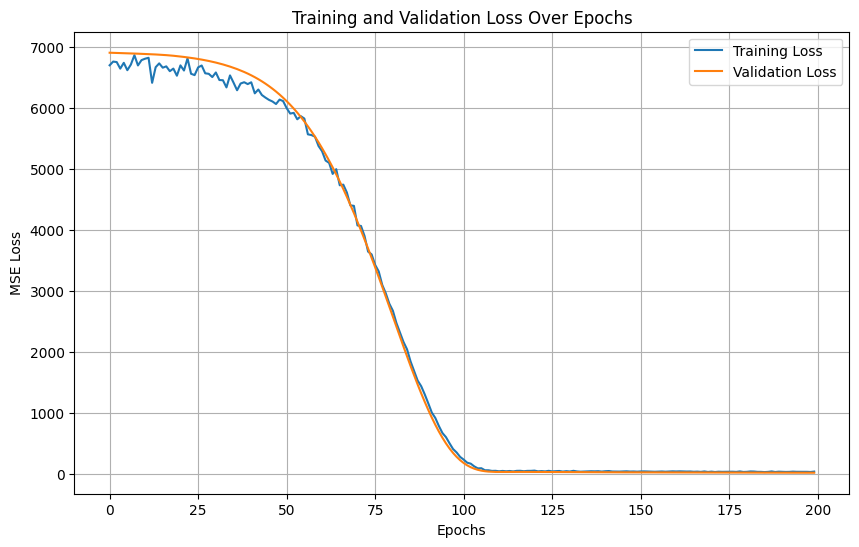


Final Test Loss: 17.0755


In [44]:

# 4. Vẽ biểu đồ loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# 5. Đánh giá mô hình cuối cùng
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    print(f'\nFinal Test Loss: {test_loss.item():.4f}')

In [45]:
## ĐỀ XUẤT
import torch.nn as nn

class ImprovedEduPredictor(nn.Module):
    def __init__(self):
        super(ImprovedEduPredictor, self).__init__()
        # Wide path (bảo toàn thông tin đặc trưng gốc)
        self.wide = nn.Linear(5, 16)
        
        # Deep path
        self.deep = nn.Sequential(
            nn.Linear(5, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            
            nn.Linear(32, 16),
            nn.ReLU()
        )
        
        # Kết hợp wide và deep
        self.combine = nn.Sequential(
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
        
    def forward(self, x):
        wide_out = self.wide(x)
        deep_out = self.deep(x)
        combined = torch.cat([wide_out, deep_out], dim=1)
        return self.combine(combined)

In [ ]:
model = ImprovedEduPredictor()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10)

for epoch in range(200):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

Lý do lựa chọn kiến trúc:

Kết hợp Wide & Deep: Wide path: Giữ lại mối quan hệ trực tiếp giữa đặc trưng đầu vào và kết quả (phù hợp cho mối quan hệ tuyến tính như thời gian học → điểm số)
Deep path: Bắt các mối quan hệ phi tuyến phức tạp (tương tác giữa môn học, tham dự và thời gian học)

Batch Normalization:
Ổn định quá trình huấn luyện với dữ liệu có phân phối khác nhau (vd: % tham dự từ 0-100, thời gian học từ 2-7 giờ)
Giúp mô hình hội tụ nhanh hơn

CÂU 19

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

# Dự đoán trên tập test
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Tính các chỉ số
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE trên tập test: {mse:.4f}')
print(f'R² trên tập test: {r2:.4f}')

MSE trên tập test: 656.4920
R² trên tập test: -5.6164


In [48]:
# Kiểm tra tương quan giữa các đặc trưng và điểm số
print(df_final.corr()['Score'].sort_values(ascending=False))

Score               1.000000
Study_Hours         0.872442
Attendance (%)      0.857855
Course_Math         0.244258
Course_Chemistry   -0.041703
Course_Physics     -0.202555
Name: Score, dtype: float64


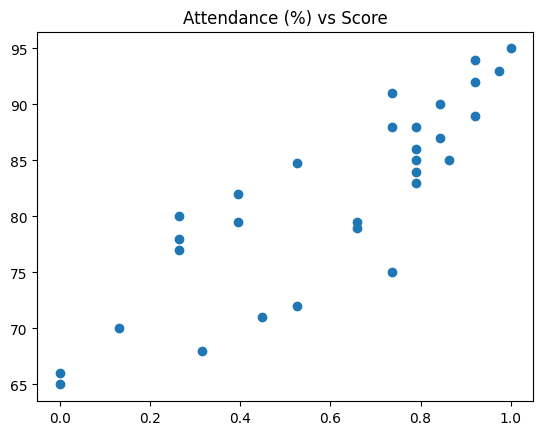

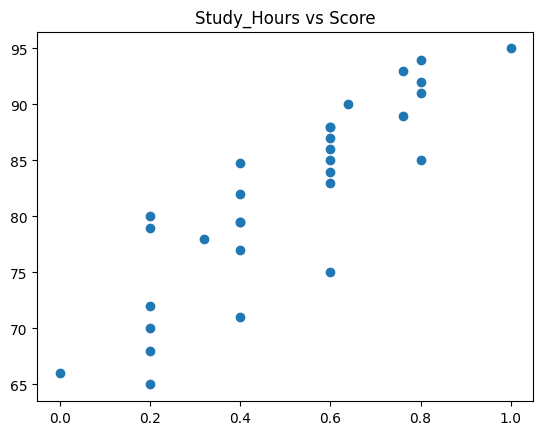

In [49]:
# Vẽ scatter plot từng đặc trưng vs Score
for feature in ['Attendance (%)', 'Study_Hours']:
    plt.scatter(df_final[feature], df_final['Score'])
    plt.title(f'{feature} vs Score')
    plt.show()

In [50]:
# Kiểm tra tương tác bằng groupby
print(df.groupby(['Course'])['Score'].mean())
print(df.groupby(['Course', pd.cut(df['Study_Hours'], bins=3)])['Score'].mean())

Course
Chemistry    81.400000
Math         84.777778
Physics      79.500000
Name: Score, dtype: float64
Course     Study_Hours   
Chemistry  (1.995, 3.667]    69.000000
           (3.667, 5.333]    82.500000
           (5.333, 7.0]      85.000000
Math       (1.995, 3.667]    74.500000
           (3.667, 5.333]    83.555556
           (5.333, 7.0]      93.666667
Physics    (1.995, 3.667]    71.000000
           (3.667, 5.333]    80.400000
           (5.333, 7.0]      91.000000
Name: Score, dtype: float64


/var/folders/1m/70qfpwps5s5_mt_5gq_3fm480000gn/T/ipykernel_1245/2955289971.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['Course', pd.cut(df['Study_Hours'], bins=3)])['Score'].mean())


In [ ]:
## Đề xuất triển khai Mô hình Đa nhiệm (Multi-task Learning)
class MultiTaskEduModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Shared layers
        self.shared = nn.Sequential(
            nn.Linear(5, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        
        # Task 1: Dự đoán điểm số (regression)
        self.score_head = nn.Linear(32, 1)
        
        # Task 2: Phân loại nhóm điểm (classification)
        self.group_head = nn.Sequential(
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 3)  # 3 nhóm: Low/Medium/High
        )
    
    def forward(self, x):
        shared = self.shared(x)
        score = self.score_head(shared)
        group = self.group_head(shared)
        return score, group